In [1]:
#Load Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load data
tips = pd.read_csv("C:/Users/LILIAN/Desktop/Linear Regression By Levi/tips.csv") 

In [3]:
#see the first 3 rows of the data
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


#### EXPLORATORY ANALYSIS

In [4]:
#the number of duplicates
tips.duplicated().sum()

1

In [5]:
#for the summary statistics
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
#Find null values
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
#Datatypes
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [8]:
#count uniue values in each column 
tips.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [9]:
#count unique value by each row
tips.nunique(axis=1)

0      7
1      7
2      7
3      7
4      7
      ..
239    7
240    6
241    6
242    7
243    7
Length: 244, dtype: int64

In [12]:
#to check the column names
list(tips.columns)

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [110]:
# select relevant columns to this analysis 
#world_happiness = wh.iloc[:, [1,2,3,4,8,11]]

In [13]:
#Drop columns not relevant to the analysis
tips = tips.drop(columns =['sex', 'smoker','day','time','size'], axis=1)

In [14]:
tips.head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


PERFORMING SOME DESCRIPTIVE STATISTICS TO CHECK THE RELATIONSHIP 

In [59]:
print (tips.mean())

total_bill    19.785943
tip            2.998279
dtype: float64


In [61]:
print(tips['total_bill'].corr(tips['tip']))

0.6757341092113641


THE RESULT ABOVE SHOWS A STRONG POSITIVE CORRELATION. MEANING AS THE TOTAL BILL INCREASES, 
THE TIP ALSO INCREASE

In [29]:
#the min & max value of tip column
print(tips['tip'].max())
print(tips['tip'].min())

10.0
1.0


In [15]:
# Basic information and description
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
dtypes: float64(2)
memory usage: 3.9 KB


In [84]:
tips.corr().style.background_gradient(cmap ='coolwarm')

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [17]:
import seaborn as sns

In [18]:
#to check out a column of the dataset
#tips['Happiness Score']

In [168]:
#to rename column
#wh.rename(columns ={'Happiness Rank':'Happiness_Rank'}, inplace = True)

#### CORRELATION PLOT TO FIND A RELATION BETWEEN VARIABLES

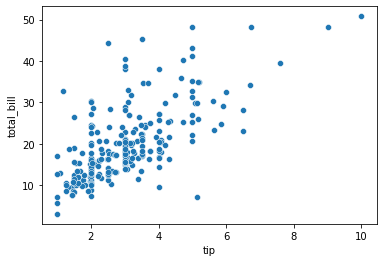

In [19]:
# Draw the scatter plot
sns.scatterplot(x="tip",
                y="total_bill",
                data=tips)
plt.show()

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

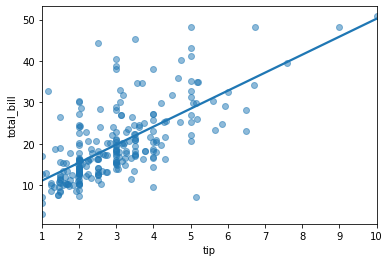

In [26]:
# Draw a trend line on the scatter plot of total bill vs. tip 
sns.regplot(x="tip",
            y="total_bill",
            data=tips,
            ci=None,
            scatter_kws={'alpha': 0.5})

In [72]:
plt.savefig('save_as_a_png.png')

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

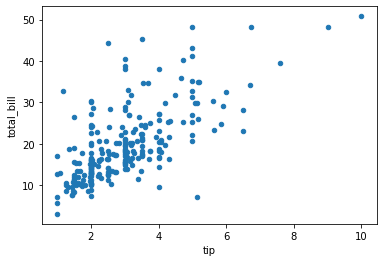

In [20]:
tips.plot.scatter(x='tip', y='total_bill')

In [22]:
# Import the ols function
from statsmodels.formula.api import ols

In [23]:
# Create the model object
ind_vs_dep = ols("total_bill ~ tip", data=tips)

In [24]:
# Fit the model
ind_vs_dep = ind_vs_dep.fit()

In [25]:
# Print the parameters of the fitted model
print(ind_vs_dep.params)

Intercept    6.750284
tip          4.347714
dtype: float64


tip = explanatory variable
total bill = response variable

#### PREDICTING THE TOTAL BILL OF CUSTOMERS.
we will specify the values of each tip, feed them to the model and get a prediction for the 
corresponding total bill.

In [30]:
# Import numpy with alias np
import numpy as np

In [31]:
# Create the tip_data which is the explanatory data 
tip_data = pd.DataFrame({'tip': np.arange(0, 10.0)})

In [32]:
# Print it
print(tip_data)

   tip
0  0.0
1  1.0
2  2.0
3  3.0
4  4.0
5  5.0
6  6.0
7  7.0
8  8.0
9  9.0


In [33]:
# Using the model,ind_vs_dep to predict the tip_data
total_bill = ind_vs_dep.predict(tip_data)

# Print it
print(total_bill)

0     6.750284
1    11.097998
2    15.445712
3    19.793426
4    24.141141
5    28.488855
6    32.836569
7    37.184283
8    41.531997
9    45.879712
dtype: float64


In [34]:
# Create prediction_data
prediction_data = tip_data.assign(
    total_bill = total_bill)

# Print the result
print(prediction_data)

   tip  total_bill
0  0.0    6.750284
1  1.0   11.097998
2  2.0   15.445712
3  3.0   19.793426
4  4.0   24.141141
5  5.0   28.488855
6  6.0   32.836569
7  7.0   37.184283
8  8.0   41.531997
9  9.0   45.879712


#### VISUALIZE THE PREDICTION

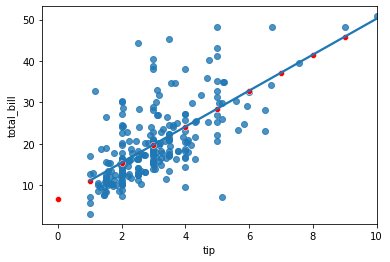

<Figure size 432x288 with 0 Axes>

In [79]:
# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="tip",
            y="total_bill",
            data=tips,
            ci=None)

# Add a scatter plot layer to the regplot
sns.scatterplot(x="tip",y="total_bill",data = prediction_data, color="red")

# Show the layered plot
plt.show()

#saving a seaborn file as png
plt.savefig('save_as_a_png.png')

#### EXTRACTING MODEL ELEMENTS

Because the model object created by ols() contains many elements. To perform further analysis on the 
model results, we need to extract its useful bits such as the model coefficients, the fitted values 
and the residuals which are the most important pieces of the linear model object. 

In [38]:
# Print the model parameters of ind_vs_dep
print(ind_vs_dep.params)

Intercept    6.750284
tip          4.347714
dtype: float64


In [39]:
# Print the fitted values of ind_vs_dep
print(ind_vs_dep.fittedvalues)

0      11.141475
1      13.967489
2      21.967283
3      21.141218
4      22.445532
         ...    
239    32.488752
240    15.445712
241    15.445712
242    14.358784
243    19.793426
Length: 244, dtype: float64


In [40]:
# Print the residuals of ind_vs_dep
print(ind_vs_dep.resid)

0       5.848525
1      -3.627489
2      -0.957283
3       2.538782
4       2.144468
         ...    
239    -3.458752
240    11.734288
241     7.224288
242     3.461216
243    -1.013426
Length: 244, dtype: float64


In [41]:
# Print a summary of ind_vs_dep
print(ind_vs_dep.summary())

                            OLS Regression Results                            
Dep. Variable:             total_bill   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           6.69e-34
Time:                        11:35:41   Log-Likelihood:                -804.77
No. Observations:                 244   AIC:                             1614.
Df Residuals:                     242   BIC:                             1621.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7503      1.006      6.707      0.0

#### TO MANUALLY PREDICT THE TOTAL BILL
Another simple way to predict the total bill are as follows

In [45]:
# Get the coefficients of ind_vs_dep
data_coeffs = ind_vs_dep.params

In [46]:
# Get the intercept
intercept = data_coeffs[0]

In [47]:
# Get the slope
slope = data_coeffs[1]

In [48]:
# Manually calculate the predictions
total_bill = intercept + slope * tip_data
print(total_bill)

         tip
0   6.750284
1  11.097998
2  15.445712
3  19.793426
4  24.141141
5  28.488855
6  32.836569
7  37.184283
8  41.531997
9  45.879712


In [49]:
# Compare to the results from .predict()
print(total_bill.assign(predictions_auto=ind_vs_dep.predict(tip_data)))

         tip  predictions_auto
0   6.750284          6.750284
1  11.097998         11.097998
2  15.445712         15.445712
3  19.793426         19.793426
4  24.141141         24.141141
5  28.488855         28.488855
6  32.836569         32.836569
7  37.184283         37.184283
8  41.531997         41.531997
9  45.879712         45.879712


#### DRAWING DIAGNOSTIC PLOTS

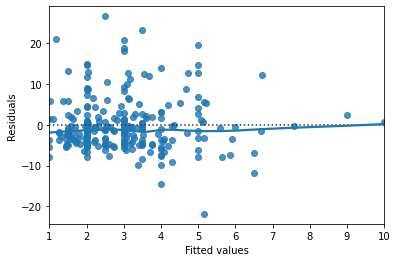

<Figure size 432x288 with 0 Axes>

In [78]:
# Plot the residuals vs. fitted values
sns.residplot(x="tip", y="total_bill", data=tips, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

#saving a pdf file
plt.savefig('saving-a-seaborn-plot-as-pdf-file.pdf')

#### CREATE THE Q-Q PLOT OF THE RESIDUALS

In [52]:
# Import qqplot
from statsmodels.api import qqplot

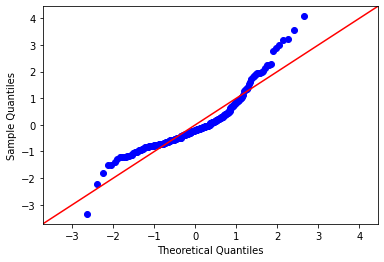

<Figure size 432x288 with 0 Axes>

In [77]:
# Create the Q-Q plot of the residuals
qqplot(data=ind_vs_dep.resid, fit=True, line="45")

# Show the plot
plt.show()

#saving a eps file
plt.savefig('saving-a-seaborn-plot-as-eps-file.eps')

#### CREATE THE SCALE LOCATION PLOT

In [57]:
# Preprocessing steps
model_norm_residuals = ind_vs_dep.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

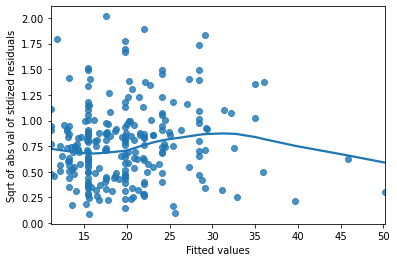

<Figure size 432x288 with 0 Axes>

In [80]:
# Create the scale-location plot
sns.regplot(x=ind_vs_dep.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

plt.savefig('save_as_a_png.png')

The above (three diagnostic) plots help to check the quality of the models.